<a href="https://colab.research.google.com/github/k24015887/group_project_1/blob/main/Kriging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykrige

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.6/979.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skimage.metrics import structural_similarity as ssim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/data/seeg'

Mounted at /content/drive


In [ ]:
#Loading the coordinates from the .npy file with shape [1772, 3]
#1772 xyz coordinates
coords_path = os.path.join(file_path, 'coords.npy')
coords = np.load(coords_path)

#As we are uding 2D interpolation, we only need x and y coordinates (columns 0 and 1)
x_coords = coords[:, 1]
y_coords = coords[:, 2]

#Loading the frequency bands data from .npy file
#since the file stores a dictionary, we use allow_pickle=True
band_powers_path = os.path.join(file_path, 'band_powers.npy')
band_powers = np.load(band_powers_path, allow_pickle=True).item()

#Print the available keys to inspect the dictionary content
print(band_powers.keys())

#Choosing a frequency band to interpolate form "alpha", "beta", "delta", "theta","gamma"
#Each frequency band has 1772 power estimates, 1 for each coordinate
band = 'Delta'
band_values = np.array(band_powers[band])

vmin = np.min(band_powers[band])
vmax = np.max(band_powers[band])


dict_keys(['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])


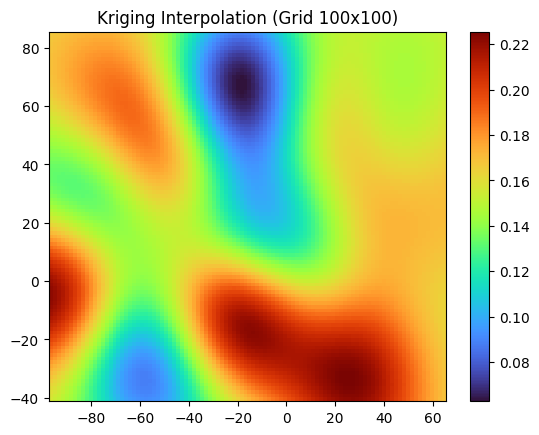

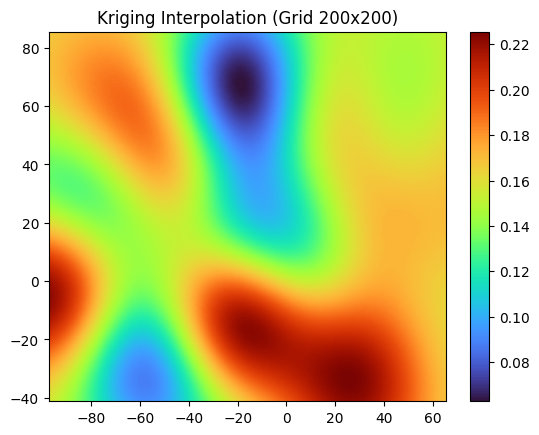

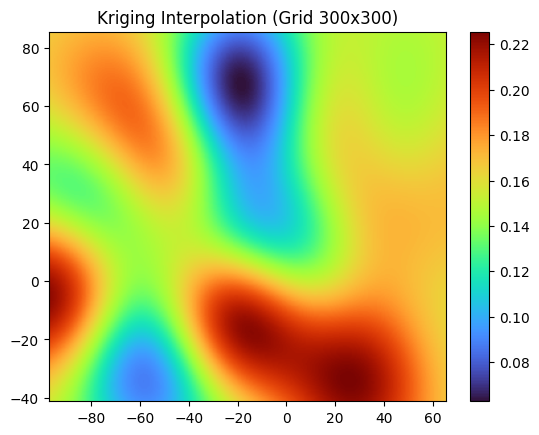

In [ ]:
#Check differences in resolutions
#Grid covering the range of x and y coordinates
for size in [100, 200, 300]:
    grid_x = np.linspace(np.min(x_coords), np.max(x_coords), size)
    grid_y = np.linspace(np.min(y_coords), np.max(y_coords), size)

    #Ordinary Kriging with a Gaussian variogram model
    OK = OrdinaryKriging(x_coords, y_coords, band_values, variogram_model="gaussian", verbose=False, enable_plotting=False)
    #Execute kriging interpolation over the grid
    z, ss = OK.execute("grid", grid_x, grid_y)

    plt.imshow(z, extent=(np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)),
               origin='lower', cmap='turbo', aspect='auto')
    plt.title(f"Kriging Interpolation (Grid {size}x{size})")
    plt.colorbar()
    plt.show()

In [ ]:
#Applying Gaussian Kriging

#grid covering the range of x and y coordinates.
grid_x = np.linspace(np.min(x_coords), np.max(x_coords), 200)
grid_y = np.linspace(np.min(y_coords), np.max(y_coords), 200)

#Set up the Ordinary Kriging with a Gaussian variogram model.
OK = OrdinaryKriging(
    x_coords, y_coords, band_values,
    variogram_model='gaussian',
    verbose=False,
    enable_plotting=False
)

#Execute the kriging interpolation over the grid.
z, ss = OK.execute('grid', grid_x, grid_y)

In [ ]:
#Set up the Ordinary Kriging with a Gaussian variogram model.
OK = OrdinaryKriging(
    x_coords, y_coords, band_values,
    variogram_model='spherical',
    verbose=False,
    enable_plotting=False
)

#Execute the kriging interpolation over the grid.
z, ss = OK.execute('grid', grid_x, grid_y)

In [ ]:
#Set up the Ordinary Kriging with a Gaussian variogram model.
OK = OrdinaryKriging(
    x_coords, y_coords, band_values,
    variogram_model='exponential',
    verbose=False,
    enable_plotting=False
)

#Execute the kriging interpolation over the grid.
z, ss = OK.execute('grid', grid_x, grid_y)

In [ ]:
#Evaluation metrics

#For each original data point we extract the interpolated value using the Kriging model
interpolated_values = []
for i in range(len(x_coords)):
  #'points' mode helps predict at the given coordinate
  interp_val, _ = OK.execute('points', [x_coords[i]], [y_coords[i]])
  interpolated_values.append(interp_val[0])
interpolated_values = np.array(interpolated_values)

#Mean Squared Error (MSE)
mse_val = mean_squared_error(band_values, interpolated_values)

#Mean Absolute Error (MAE)
mae_val = mean_absolute_error(band_values, interpolated_values)

#Root Mean Squared Error (RMSE)
rmse_val = np.sqrt(mse_val)

#R2 Score
r2_val = r2_score(band_values, interpolated_values)

#Print the results
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"R² Score: {r2_val:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 0.0021
Mean Absolute Error (MAE): 0.0183
Root Mean Squared Error (RMSE): 0.0463
R² Score: 0.5545


In [ ]:
#For each original data point we extract the interpolated value using the Kriging model
interpolated_values = []
for i in range(len(x_coords)):
  #'points' mode helps predict at the given coordinate
  interp_val, _ = OK.execute('points', [x_coords[i]], [y_coords[i]])
  interpolated_values.append(interp_val[0])
interpolated_values = np.array(interpolated_values)

#Mean Squared Error (MSE)
mse_val = mean_squared_error(band_values, interpolated_values)

#Mean Absolute Error (MAE)
mae_val = mean_absolute_error(band_values, interpolated_values)

#Root Mean Squared Error (RMSE)
rmse_val = np.sqrt(mse_val)

#R2 Score
r2_val = r2_score(band_values, interpolated_values)

#Print the results
print("Evaluation Metrics (Spherical Kriging):")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"R² Score: {r2_val:.4f}")

Evaluation Metrics (Spherical Kriging):
Mean Squared Error (MSE): 0.0015
Mean Absolute Error (MAE): 0.0157
Root Mean Squared Error (RMSE): 0.0381
R² Score: 0.6974


In [ ]:
#For each original data point we extract the interpolated value using the Kriging model
interpolated_values = []
for i in range(len(x_coords)):
  #'points' mode helps predict at the given coordinate
  interp_val, _ = OK.execute('points', [x_coords[i]], [y_coords[i]])
  interpolated_values.append(interp_val[0])
interpolated_values = np.array(interpolated_values)

#Mean Squared Error (MSE)
mse_val = mean_squared_error(band_values, interpolated_values)

#Mean Absolute Error (MAE)
mae_val = mean_absolute_error(band_values, interpolated_values)

#Root Mean Squared Error (RMSE)
rmse_val = np.sqrt(mse_val)

#R2 Score
r2_val = r2_score(band_values, interpolated_values)

#Print the results
print("Evaluation Metrics (Exponential Kriging):")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"R² Score: {r2_val:.4f}")

Evaluation Metrics (Exponential Kriging):
Mean Squared Error (MSE): 0.0008
Mean Absolute Error (MAE): 0.0121
Root Mean Squared Error (RMSE): 0.0286
R² Score: 0.8298


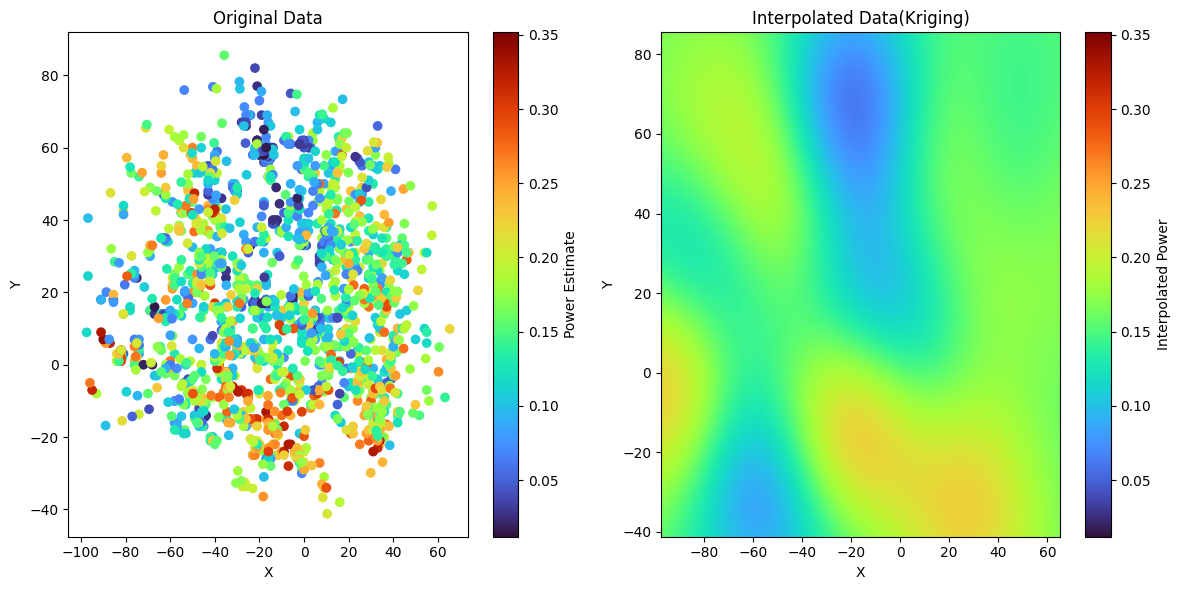

In [ ]:
#Visualise results using frequency band delta

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


The results above show the distribution of Delta band power in sEEG recordings. The left plot represents the original data, where each dot is an electrode measuring brain activity, with colours indicating power levels. The right plot applies Gaussian Kriging to inteprolate values between eelctrodes, creating a smoother representation of brain activity. The delta band (0.5-4 Hz) is linked to deep sleep, unconscious states, brain injuries, and epilepsy. High delta power in certain areas may indicate abnormal brain function or seizure activity.

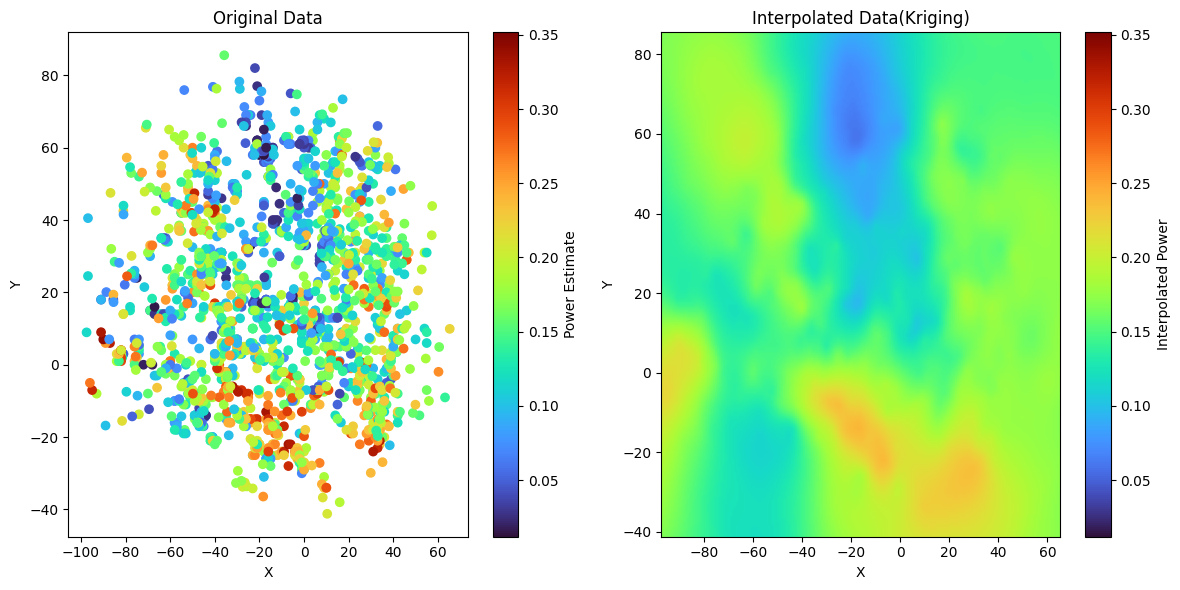

In [ ]:
#Visualise results using frequency band delta (Spherical Kriging)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


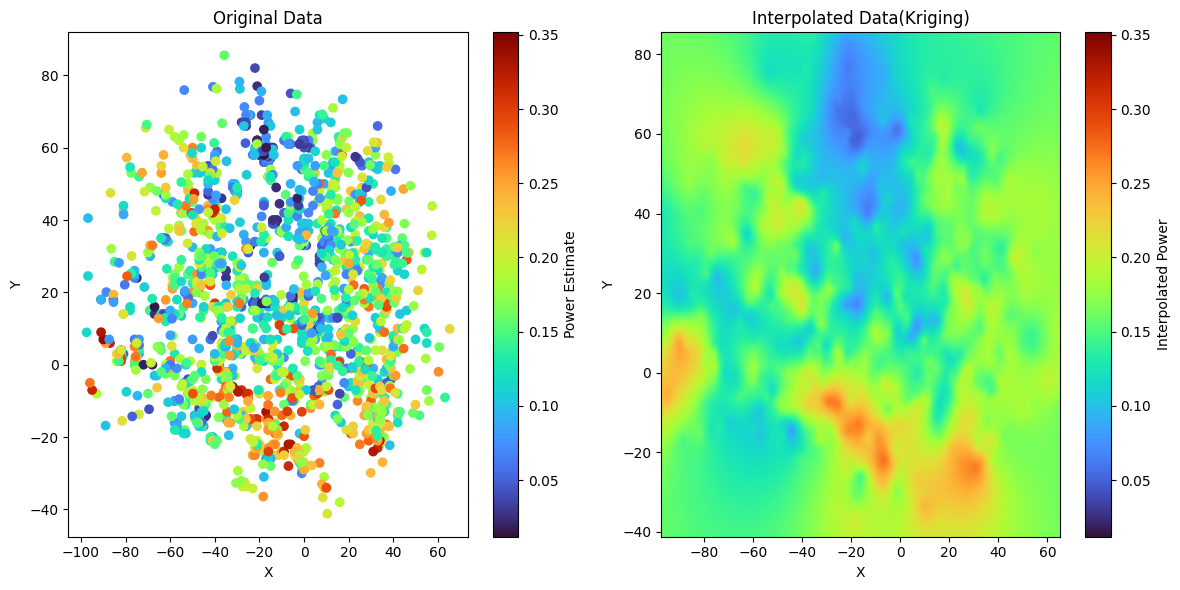

In [ ]:
#Visualise results using frequency band delta (Exponential Kriging)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()

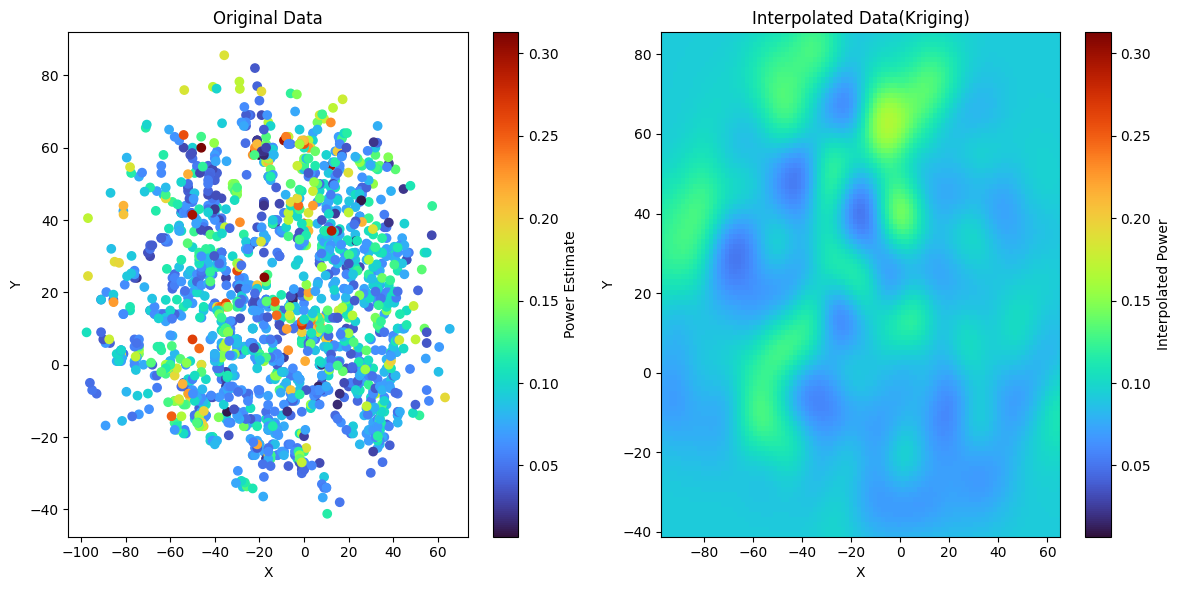

In [ ]:
#Visualise results using frequency band theta

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


The theta band (4-8Hz) is associated with memory processing, drowsiness, and cognitive functions, but increased theta power can also be linked to neurological disorders, brain injuries, or epilepsy.

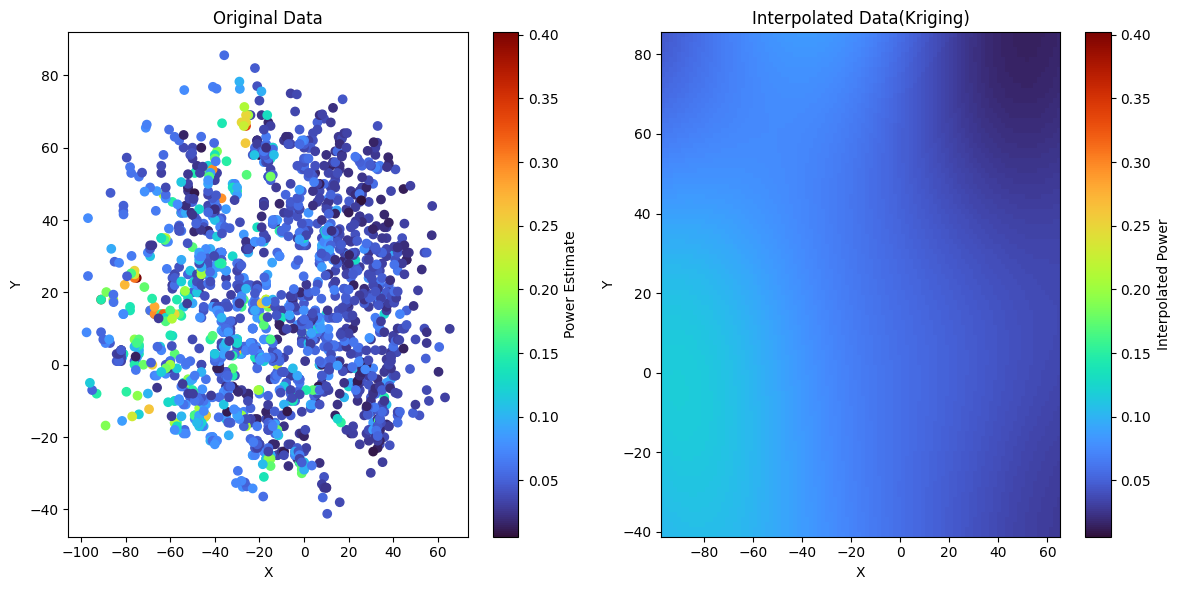

In [ ]:
#Visualise results using frequency band alpha

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


The alpha band (8-12 Hz) is linked to relaxation, attention, and cognitive processing, often increasing when a person is awake but relaxed. Low alpha power can be associated with stress, cognitive impairement, or neurological disorders.

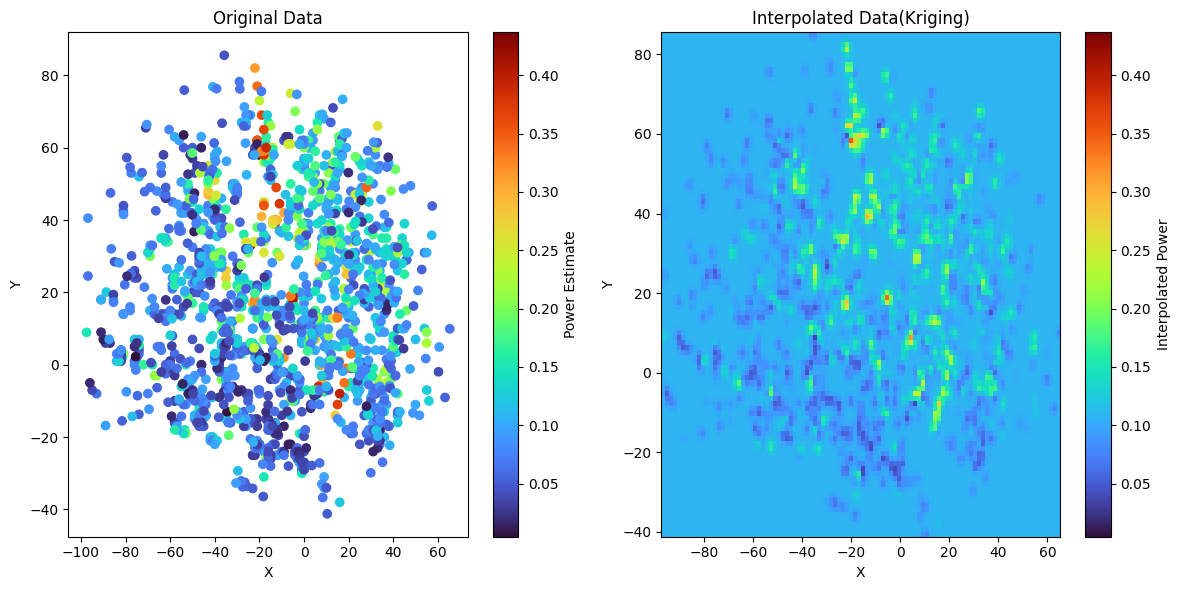

In [ ]:
#Visualise results using frequency band beta

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


The beta band (12-30 Hz is associated with active thinking, problem-solving, and motor control. Increased beta power can idnicate heightened cognitive activity or anxiety, while decreased beta activity is linked to neurological disorders such as Parkinson's disease.

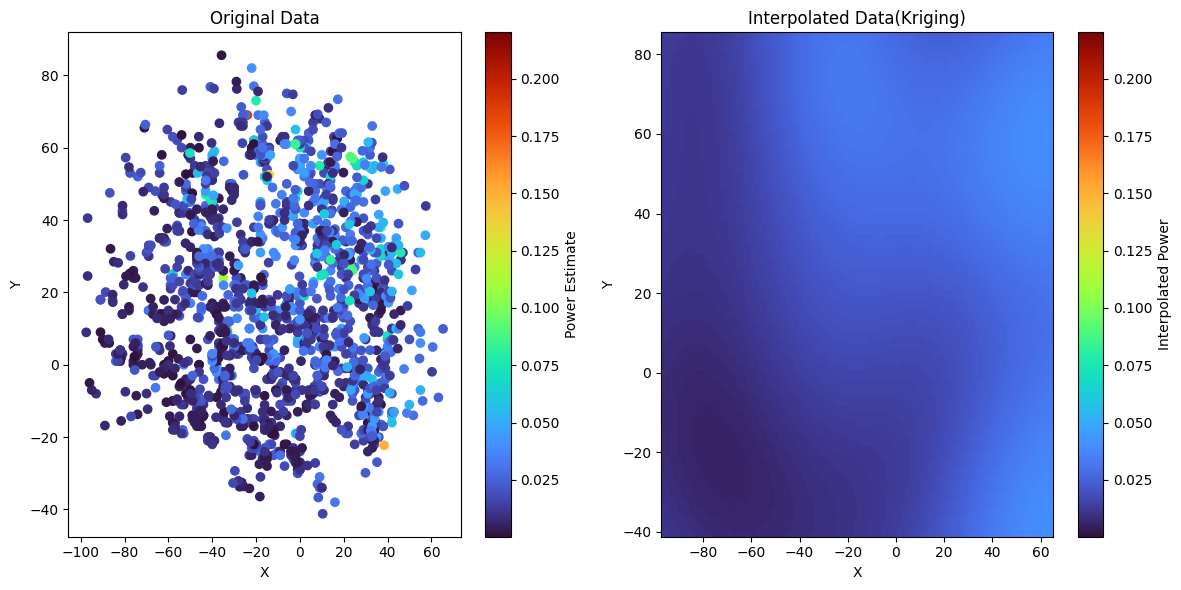

In [ ]:
#Visualise results using frequency band gamma

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot original (scattered) data: colour represents the power estimate
sc = ax1.scatter(x_coords, y_coords, c=band_values, cmap='turbo',vmin=vmin,vmax=vmax)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Original Data')
plt.colorbar(sc, ax=ax1, label='Power Estimate')

#Plot interpolated data using imshow
im = ax2.imshow(z, extent=[np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords)], origin='lower', cmap='turbo', aspect='auto', vmin=vmin,vmax=vmax)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Interpolated Data(Kriging)')
plt.colorbar(im, ax=ax2, label='Interpolated Power')

plt.tight_layout()
plt.show()


The gamma band (30-100 Hz) is associated with high-level cognitive functions,including perception, attention, and memory processing. Increased gamma activity is linked to focused mental activity, while abnormalities in gamma power have been observed in neurological disorders like schizophrenia and Alzheimer's disease.